In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load the dataset
df = pd.read_csv("Retail_Sales_Data.csv")

# Display the first few rows to inspect the data
df.head()

C:\Users\niraj_1kwckht\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\niraj_1kwckht\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


,Transaction_ID,Customer_ID,State,Age,Shop_Category,Sales,Gender,Items_in_basket
0,1,1234,MP,10,Grocery,10,M,2
1,2,1235,UP,21,Dairy,30,F,3
2,3,1236,AP,23,Deli,23,F,4
3,4,1237,RP,25,Meat,21,F,4
4,5,1238,DP,27,Clothes,90,F,3


In [3]:
# 2) Explore the dataset and Check basic info and structure of the dataset
df.info()

# Check for any missing values
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction_ID   312 non-null    int64 
 1   Customer_ID      312 non-null    int64 
 2   State            312 non-null    object
 3   Age              312 non-null    int64 
 4   Shop_Category    312 non-null    object
 5   Sales            312 non-null    int64 
 6   Gender           312 non-null    object
 7   Items_in_basket  312 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 19.6+ KB
Missing values:
 Transaction_ID     0
Customer_ID        0
State              0
Age                0
Shop_Category      0
Sales              0
Gender             0
Items_in_basket    0
dtype: int64


In [5]:
# 3) Hi step phkt identify 
# 4) Group by 'State' and sum the 'Sales' column to get total sales per region
sales_by_region = df.groupby('State')['Sales'].sum().reset_index()

# Sort to identify top-performing regions
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)
print("Total sales by region:\n", sales_by_region)

Total sales by region:
   State  Sales
1    DP  23346
0    AP  12176
4    RP  11049
2    KP  10887
3    MP   4916
5    UP   4072


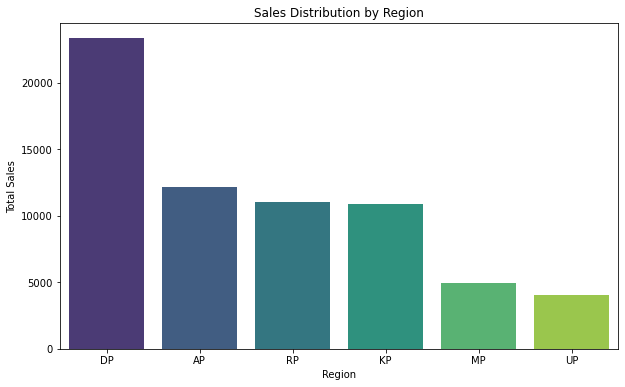

In [6]:
# 5) Bar plot for sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', data=sales_by_region, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Region')
plt.show()

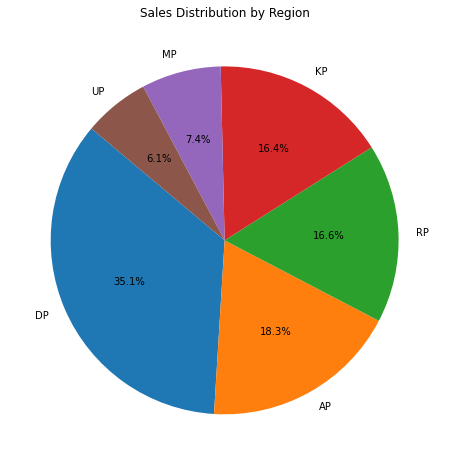

In [7]:
# 5) Pie chart for sales distribution by region - or option ahe
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Sales'], labels=sales_by_region['State'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.show()

In [8]:
# 6) Identify the top 5 regions based on sales amount
top_regions = sales_by_region.head(5)
print("Top-performing regions:\n", top_regions)

Top-performing regions:
   State  Sales
1    DP  23346
0    AP  12176
4    RP  11049
2    KP  10887
3    MP   4916


In [9]:
# 7) Group by 'State' and 'Shop_Category' and sum 'Sales' for each combination
sales_by_region_category = df.groupby(['State', 'Shop_Category'])['Sales'].sum().unstack().fillna(0)

# Display the result
print("Sales by Region and Product Category:\n", sales_by_region_category)

Sales by Region and Product Category:
 Shop_Category  Clothes   Dairy    Deli  Electronics  Grocery    Meat
State                                                               
AP              2127.0  1197.0  1303.0       3818.0    823.0  2908.0
DP              7133.0  6027.0  1723.0       4645.0   1736.0  2082.0
KP              3581.0   630.0  2595.0       2742.0     54.0  1285.0
MP               711.0     0.0  1144.0        696.0    950.0  1415.0
RP              2167.0    74.0  1006.0       3087.0   2452.0  2263.0
UP              1077.0   816.0    87.0        500.0    729.0   863.0


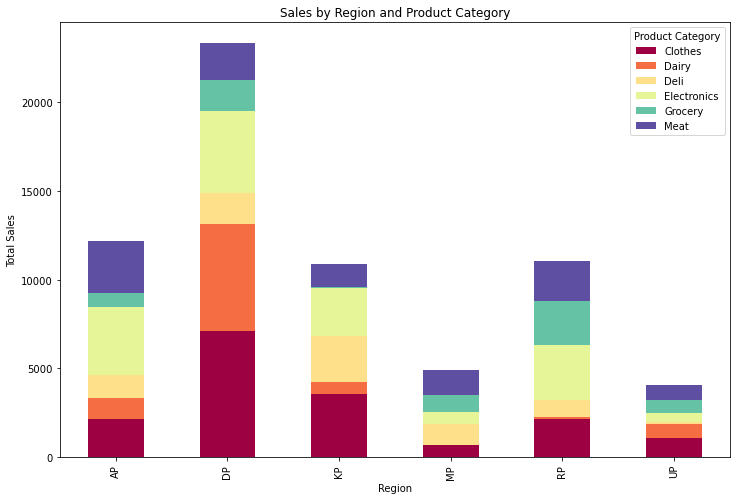

In [10]:
# 8) Stacked bar plot for sales by region and product category
sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Spectral')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region and Product Category')
plt.legend(title='Product Category')
plt.show()